In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 첫 5행 출력
df.head()

Could not save font_manager cache Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\USER\.matplotlib\fontlist-v390.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [7]:
df['전출지별'].unique

<bound method Series.unique of 0         전출지별
1           전국
2           전국
3           전국
4           전국
        ...   
320    제주특별자치도
321    제주특별자치도
322    제주특별자치도
323    제주특별자치도
324    제주특별자치도
Name: 전출지별, Length: 325, dtype: object>

In [ ]:
#nan NAN 결측치 -- 데이터 없음
#1. 제거 - 데이터가 충분해서 해당 결측치 해당 데이터를 삭제해도 충분할때.
#2. 대처
    # 단순실수로 누락도이서 뻔히 어떤값인지 알 수 있을떄
    # 결측치가 전체데이터대비 적다.. 대략 15%미만이고 데이터가 적어서 살려야 할때 - 평균, 표준편차,빈도수 다양하게 채움.
    # 보간기법이라고함 --> 자체 머신러닝을 이용햇 해당 부분의 값을 예측


In [2]:
# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [8]:
df['전출지별'].unique()


array(['전출지별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

<Axes: >

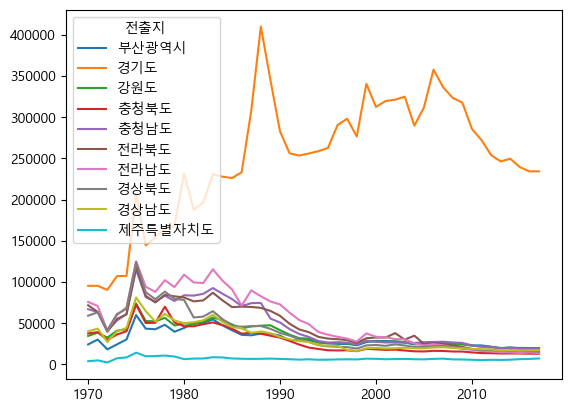

In [18]:
# 다른 지역에서 서울로 이동한 데이터
mask = (df['전출지별'] != '서울특별시') & (df['전입지별'] == '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(columns=['전입지별'])
df_seoul = df_seoul.rename(columns={'전출지별':'전출지'})
df_seoul = df_seoul.set_index('전출지')
df_seoul = df_seoul.drop(index=['전국'])
# 시각화
df_seoul.T.plot()
# df_seoul.plot()

<Axes: >

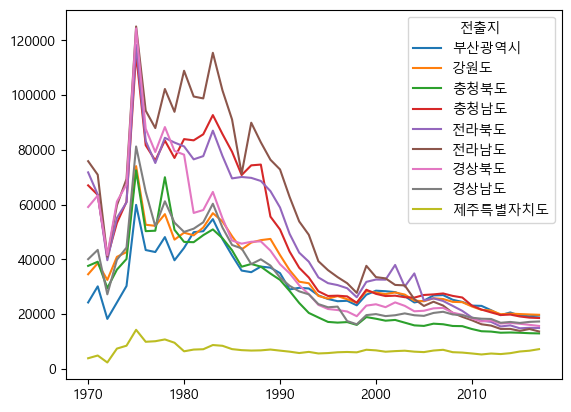

In [19]:
# 다른 지역에서 서울로 이동한 데이터
mask = (df['전출지별'] != '서울특별시') & (df['전입지별'] == '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(columns=['전입지별'])
df_seoul = df_seoul.rename(columns={'전출지별':'전출지'})
df_seoul = df_seoul.set_index('전출지')
df_seoul = df_seoul.drop(index=['전국'])
# 시각화
df_seoul.T.drop(columns=['경기도']).plot()
# df_seoul.plot()

In [4]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

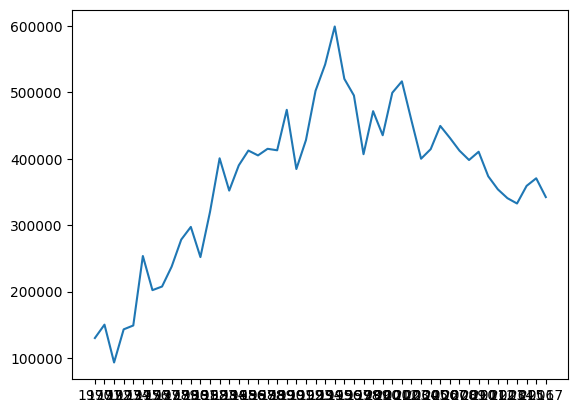

In [5]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

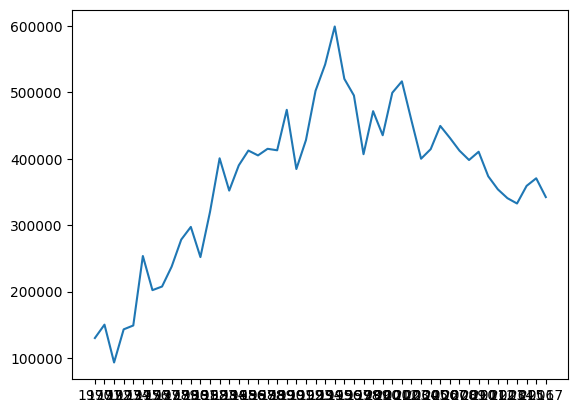

In [6]:
# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)
plt.show()

In [ ]:
#응용

In [ ]:
# https://drive.google.com/file/d/1oxUlhFbbJqUEdAZnynTJUav5mCkM9sb7/view?usp=sharing


In [21]:
%pip install pandas gdown

Note: you may need to restart the kernel to use updated packages.


In [22]:
import gdown

file_id = '1oxUlhFbbJqUEdAZnynTJUav5mCkM9sb7'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'credit.csv'

gdown.download(url,output,quiet=False)
df=pd.read_csv(output)
df.head()

#installments 할부개월수
#days_of_week 월요일 0 일요일 6
# holiday 1이면 공휴일 공휴일이 님

Downloading...
From (original): https://drive.google.com/uc?id=1oxUlhFbbJqUEdAZnynTJUav5mCkM9sb7
From (redirected): https://drive.google.com/uc?id=1oxUlhFbbJqUEdAZnynTJUav5mCkM9sb7&confirm=t&uuid=05f3ee1f-a92b-4c6a-b271-a3b22986542c
To: c:\PYTHON_SRC\pandas-data-analysis\part4\credit.csv
100%|██████████| 150M/150M [00:47<00:00, 3.14MB/s] 


,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


In [25]:
# 데이터가 날짜인데 문자열 형태 즉 object이면
# datetime으로 형식을 변경해서 년원일을 분리할 수 있다.
df['datetime'] = pd.to_datetime(df['date'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,datetime,year,month
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0,2016-12-14,2016,12
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0,2016-12-14,2016,12
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0,2016-12-19,2016,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0,2016-12-19,2016,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0,2016-12-19,2016,12


In [ ]:
#년도별 신용카드 매출액을 구해서 출력
# 시각화 출력 plot x축의 시간정보는 오름차순으로 정렬되었는지 확인

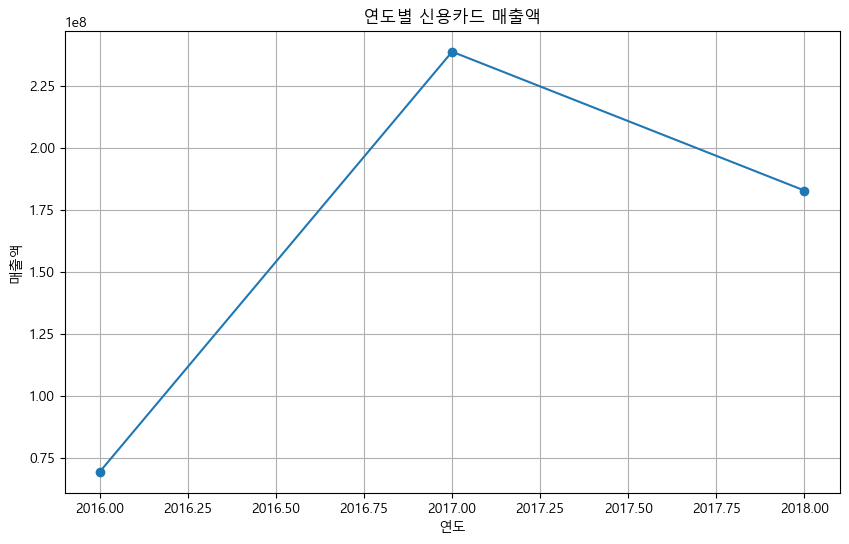


연도별 매출액:
year
2016     69385560
2017    238703895
2018    182751998
Name: amount, dtype: int64


In [26]:
# 연도별 매출액 계산
year_sales = df.groupby('year')['amount'].sum()

# 시각화
plt.figure(figsize=(10, 6))
year_sales.plot(kind='line', marker='o')
plt.title('연도별 신용카드 매출액')
plt.xlabel('연도')
plt.ylabel('매출액')
plt.grid(True)
plt.show()

# 구체적인 수치 확인
print("\n연도별 매출액:")
print(year_sales)

In [29]:
# 연도별 매출액 계산
temp = df.groupby('year')[['amount']].sum()
print(temp)

# 그래프 그리기
plt.figure(figsize=(10, 6))
temp.plot(kind='line', marker='o')
plt.title('연도별 신용카드 매출액')
plt.xlabel('연도')
plt.ylabel('매출액')
plt.grid(True)
plt.show()

         amount
year           
2016   69385560
2017  238703895
2018  182751998


In [31]:
temp.index.astype('str')


Index(['2016', '2017', '2018'], dtype='object', name='year')

<function matplotlib.pyplot.show(close=None, block=None)>

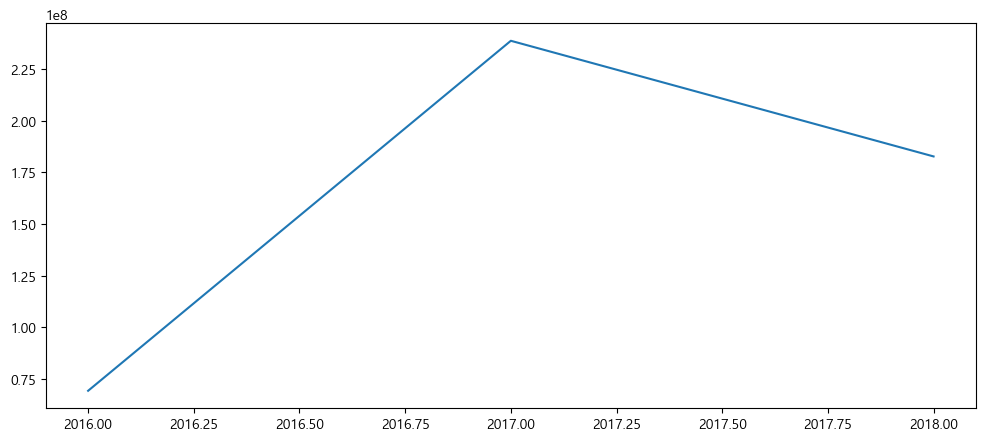

In [34]:
plt.figure(figsize = (12,5))
plt.plot(temp.index , temp.amount)
plt.show



In [35]:
plt.figure(figure=(10,3))
plt.title = '연도별 신용카드 사용액'
plt.plot(temp.index , temp.amount)
plt.show()

AttributeError: 'Figure' object has no attribute '_root_figure'

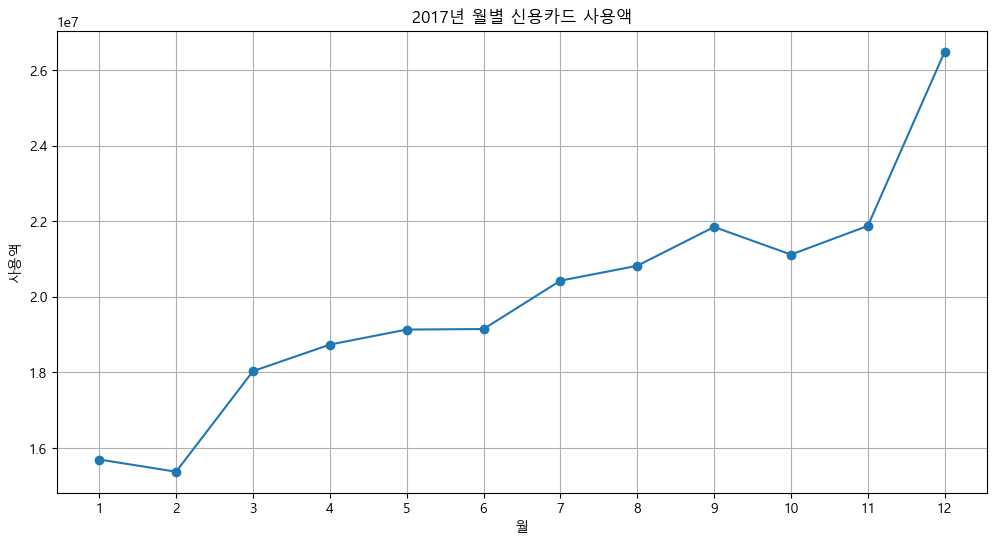


2017년 월별 신용카드 사용액:
month
1     15694901
2     15371998
3     18033087
4     18736403
5     19134008
6     19148323
7     20428280
8     20822532
9     21849819
10    21118869
11    21878184
12    26487491
Name: amount, dtype: int64


In [36]:
# 2017년 데이터만 필터링
df_2017 = df[df['year'] == 2017]

# 2017년 월별 신용카드 사용액 계산
monthly_sales_2017 = df_2017.groupby('month')['amount'].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))
monthly_sales_2017.plot(kind='line', marker='o')
plt.title('2017년 월별 신용카드 사용액')
plt.xlabel('월')
plt.ylabel('사용액')
plt.grid(True)
plt.xticks(range(1, 13))  # x축을 1부터 12까지 표시
plt.show()

# 월별 사용액 출력
print("\n2017년 월별 신용카드 사용액:")
print(monthly_sales_2017)